In [10]:
import pandas as pd
# 1. 파일 불러오기
df = pd.read_csv('avocado.csv')

# 2. 데이터 확인
print(df.head())
print(df.info())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [17]:
# 데이터 타입 변환
df['Date'] = pd.to_datetime(df['Date'])

# 월 추출
df['Month'] = df['Date'].dt.month

print(df[['Date', 'Month']].head())

# 겨울철 데이터 필터링
winter_df = df[(df['Month'] == 1) | (df['Month'] == 2) | (df['Month'] == 12)]
winter_df.head()

        Date  Month
0 2015-12-27     12
1 2015-12-20     12
2 2015-12-13     12
3 2015-12-06     12
4 2015-11-29     11


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
44,44,2015-02-22,1.07,45675.05,1088.38,35056.13,151.00,9379.54,9000.16,379.38,0.0,conventional,2015,Albany,2


In [22]:
# 1. 종류 확인
print(df['type'].unique())

# 2. 그룹별 평균 가격 구하기
type_mean = df.groupby('type')['AveragePrice'].mean()

print('\n --- 아보카도 종류별 평균 가격 ---')
print(type_mean)

['conventional' 'organic']

 --- 아보카도 종류별 평균 가격 ---
type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64


In [ ]:
# 1. TotalUS 제거 (불필요한 합계 데이터 제외)
print(df['region'].unique())

df_local = df[df['region'] != 'TotalUs']

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1


In [28]:
# 2. 지역별 평균 가격 계산 및 정렬
expensive_cities = df_local.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

print('--- 아보카도 가장 비싼 도시')
print(expensive_cities.head(3))

print('--- 아보카도 저렴한 도시')
print(expensive_cities.tail(3))

--- 아보카도 가장 비싼 도시
region
HartfordSpringfield    1.818639
SanFrancisco           1.804201
NewYork                1.727574
Name: AveragePrice, dtype: float64
--- 아보카도 저렴한 도시
region
SouthCentral     1.101243
DallasFtWorth    1.085592
Houston          1.047929
Name: AveragePrice, dtype: float64


Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
Name: AveragePrice, dtype: float64


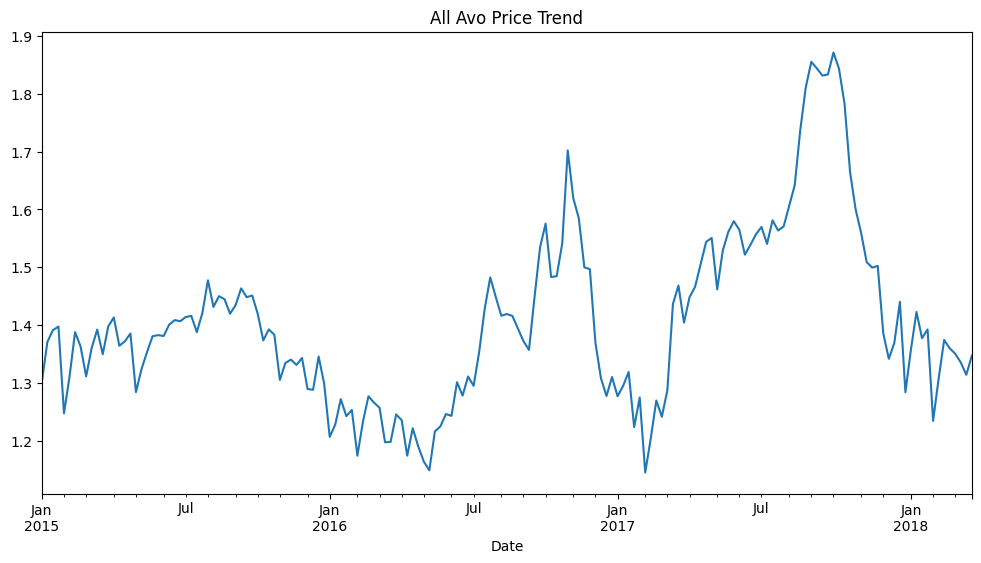

In [32]:
# 그래프 표시 설정
import matplotlib.pyplot as plt

# 1. 날짜별 전체 평균 가격 추이
daily_price = df.groupby('Date')['AveragePrice'].mean()
print(daily_price.head())

daily_price.plot(figsize=(12, 6), title = "All Avo Price Trend")
plt.show()

type        conventional   organic
Date                              
2015-01-04      1.009630  1.592963
2015-01-11      1.111296  1.630000
2015-01-18      1.133519  1.648704
2015-01-25      1.115370  1.678889
2015-02-01      0.962037  1.532037
...                  ...       ...
2018-02-25      1.141111  1.578148
2018-03-04      1.142407  1.557963
2018-03-11      1.136667  1.533519
2018-03-18      1.096296  1.531111
2018-03-25      1.147222  1.546481

[169 rows x 2 columns]


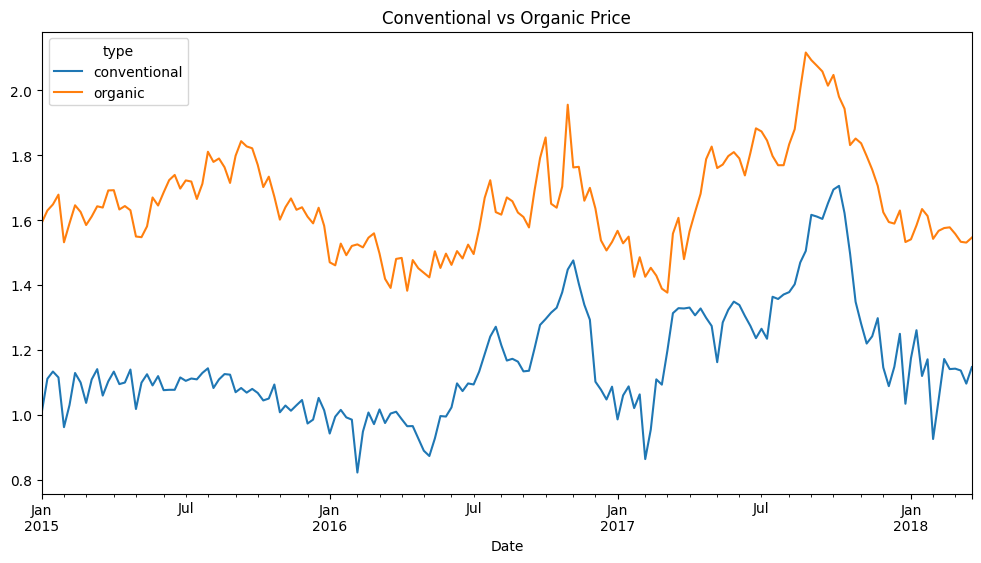

In [34]:
# 2. 일반 vs 유기농 각각 그리기
pivot_df = df.pivot_table(index = 'Date', columns='type', values='AveragePrice', aggfunc='mean')
print(pivot_df)

# 그래프 그리기
pivot_df.plot(figsize=(12, 6), title='Conventional vs Organic Price')
plt.show()

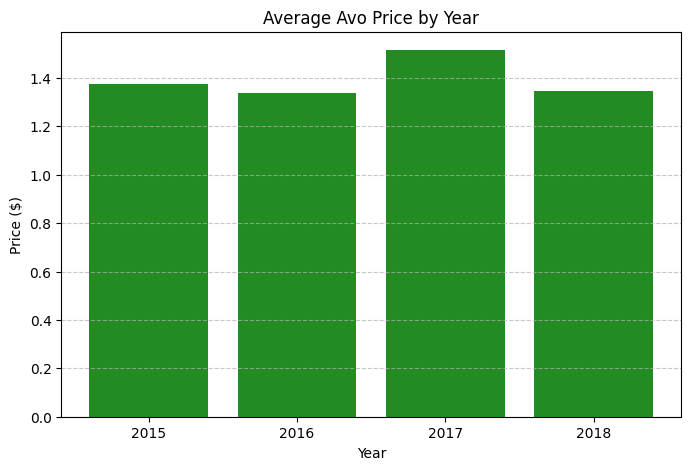

In [ ]:
# 1. 연도별 평균 가격 계산
yearly_price = df.groupby('year')['AveragePrice'].mean()

# 2. 그래프 그리기
plt.figure(figsize=(8, 5))

# 3. plt.bar(X, Y축)
plt.bar(yearly_price.index, yearly_price.values, color='forestgreen')

# 3. 꾸미기
plt.title('Average Avo Price by Year')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.xticks(yearly_price.index) # x축 눈금을 연도로 딱 맞춤
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축에만 점선 추가

plt.show()

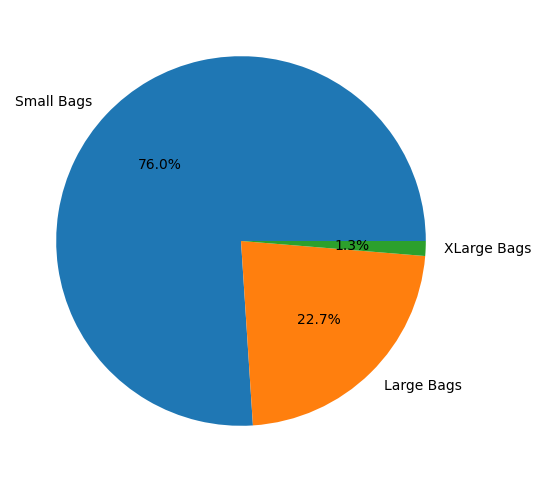

In [37]:
# 1. 가방 크기별 총 판매량 계산
# 각 컬럼의 전체 합계 (sum)를 구해서 리스트로 만든다.
bag_size = ['Small Bags', 'Large Bags', 'XLarge Bags']
bag_sums = [df['Small Bags'].sum(), df['Large Bags'].sum(), df['XLarge Bags'].sum()]

# 2. 그래프 그리기
plt.figure(figsize=(6, 6))

# plt.pie(값, labels=이름, autopct=비울표시형식)
# autopct='%.1f%%' 소숫점 첫째자리까지 %로 표시
# explode: 간격설정

plt.pie(bag_sums, labels=bag_size, autopct='%.1f%%')

plt.show()
